# Analysis of MNIST data (decoding and creating hand-written digit)

## Introduction

Handwriting recognition is a function of a computer that receives recognizable handwritten input. The input source can be a handwritten document on paper, a photograph, or a device such as a touch panel. There is a distinction between "offline handwriting recognition," which is input by optically scanning a document written "offline" in advance, and "online handwriting recognition," which is input by handwriting "online".  

Handwritten character recognition is basically based on optical character recognition technology. However, online handwriting recognition also requires a technique that takes into account stroke order and line direction to find the most likely character or word.   

Offline handwritten character recognition involves optically scanning a document image on paper and automatically converting the image into text data (data consisting of some character code) that can be processed by a computer. The resulting data can be regarded as a static representation of handwritten characters. Optical character recognition (OCR) is for printed documents, while intelligent character recognition (ICR) is for handwritten documents that are not in the so-called writing style. OCR is for printed documents, while ICR is for handwritten documents that are not in so-called written form. There is currently no OCR/ICR that can recognize all handwritten characters.   

By limiting the target area, the recognition rate of handwritten character recognition systems can often be improved. For example, if the target is a ZIP code, the character types are limited to numbers from 0 to 9. This can considerably limit the possibilities when identifying characters. 

Here I construct handwritten character recognition system using neural network model. I train the model using MNIST training data, and then test the model for MNIST test data to check the accuracy of the model. Then I also construct deep convolutional generative adversarial network (DCGAN) to generate "handwritten-like" characters through learning of generator and discriminator (Randford et al, arXiv:1511.06434).

## Method_1
I construct convolutional neural network as the following:  
1. Convolution Layer: 32 filters, kernel size (3, 3), strides (1, 1), activation Relu  
2. Convolution Layer: 64 filters, kernel size (3, 3), strides (1, 1), activation Relu  
3. Pooling layer: max pooling, pool size (2, 2)  
4. Dropout layer: dropout ration 0.2, 0.4, 0.6  
5. Flatten  
6. Dense layer: 128 units, activation Relu  
7. Dropout layer: dropout ration 0.2, 0.4, 0.6  
8. Dense layer: 10 units, activation Softmax  

I use MNIST dataset (Kussul and Baidyk, Image and Vision Computing, 2004;22:971-981). Sixty-thousand training data are used to train the neural network model, and ten-thousand test data are uses to check the accuracy of the model.



## Results_1

In [1]:
#install required packages and dataset

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten, BatchNormalization, UpSampling2D, Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical

import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [3]:
# load mnist dataset, and split into training and validation data
(x_train_val, y_train_val), (x_test, y_test) = mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=123)

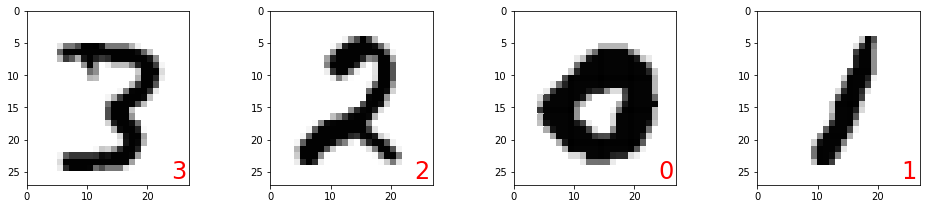

In [4]:
# check the raw data
# (visualize handwritten digits)
plt.figure(1, figsize=(16, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(4):
   plt.subplot(1, 4, id + 1)
   img = x_train[id, :, :].reshape(28, 28)
   plt.pcolor(255 - img)
   plt.text(24, 26, "%d" % y_train[id], color='red', fontsize=24)
   plt.xlim(0, 27)
   plt.ylim(27, 0)
plt.show()

In [5]:
# normalize
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# reshape
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# convert target vector to one-hot
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)


In [6]:
# check shape of the dataset
print('x_train :', x_train.shape)
print('x_val :', x_val.shape)
print('x_test  :', x_test.shape)
print('y_train :', y_train.shape)
print('y_val :', y_val.shape)
print('y_test  :', y_test.shape)


x_train : (48000, 28, 28, 1)
x_val : (12000, 28, 28, 1)
x_test  : (10000, 28, 28, 1)
y_train : (48000, 10)
y_val : (12000, 10)
y_test  : (10000, 10)


In [7]:
# construct convolutional neural network model1 (dropout = 0.2)
cnn_model1 = Sequential()
cnn_model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model1.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model1.add(Dropout(0.2))
cnn_model1.add(Flatten())
cnn_model1.add(Dense(128, activation='relu'))
cnn_model1.add(Dropout(0.2))
cnn_model1.add(Dense(10, activation='softmax'))

In [8]:
# check the model
cnn_model1.summary()

opt1 = Adam()
cnn_model1.compile(loss="categorical_crossentropy", optimizer=opt1, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [9]:
# learning
cnn_history1 = cnn_model1.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_val, y_val))

Epoch 1/10
375/375 [==============================] - 32s 85ms/step - loss: 0.2033 - accuracy: 0.9371 - val_loss: 0.0677 - val_accuracy: 0.9802
Epoch 2/10
375/375 [==============================] - 33s 88ms/step - loss: 0.0572 - accuracy: 0.9821 - val_loss: 0.0481 - val_accuracy: 0.9856
Epoch 3/10
375/375 [==============================] - 34s 90ms/step - loss: 0.0391 - accuracy: 0.9873 - val_loss: 0.0472 - val_accuracy: 0.9869
Epoch 4/10
375/375 [==============================] - 33s 89ms/step - loss: 0.0293 - accuracy: 0.9905 - val_loss: 0.0476 - val_accuracy: 0.9861
Epoch 5/10
375/375 [==============================] - 34s 90ms/step - loss: 0.0247 - accuracy: 0.9918 - val_loss: 0.0467 - val_accuracy: 0.9871
Epoch 6/10
375/375 [==============================] - 34s 92ms/step - loss: 0.0186 - accuracy: 0.9935 - val_loss: 0.0448 - val_accuracy: 0.9887
Epoch 7/10
375/375 [==============================] - 35s 94ms/step - loss: 0.0152 - accuracy: 0.9951 - val_loss: 0.0501 - val_accuracy:

In [13]:
# construct convolutional neural network model2 (dropout = 0.4)
cnn_model2 = Sequential()
cnn_model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model2.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model2.add(Dropout(0.4))
cnn_model2.add(Flatten())
cnn_model2.add(Dense(128, activation='relu'))
cnn_model2.add(Dropout(0.4))
cnn_model2.add(Dense(10, activation='softmax'))

In [14]:
# check the model
cnn_model2.summary()

opt2 = Adam()
cnn_model2.compile(loss="categorical_crossentropy", optimizer=opt2, metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [15]:
# learning
cnn_history2 = cnn_model2.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_val, y_val))

Epoch 1/10
375/375 [==============================] - 32s 86ms/step - loss: 0.2425 - accuracy: 0.9257 - val_loss: 0.0670 - val_accuracy: 0.9788
Epoch 2/10
375/375 [==============================] - 33s 88ms/step - loss: 0.0814 - accuracy: 0.9755 - val_loss: 0.0496 - val_accuracy: 0.9847
Epoch 3/10
375/375 [==============================] - 33s 89ms/step - loss: 0.0604 - accuracy: 0.9811 - val_loss: 0.0442 - val_accuracy: 0.9868
Epoch 4/10
375/375 [==============================] - 33s 88ms/step - loss: 0.0479 - accuracy: 0.9847 - val_loss: 0.0418 - val_accuracy: 0.9883
Epoch 5/10
375/375 [==============================] - 33s 89ms/step - loss: 0.0388 - accuracy: 0.9875 - val_loss: 0.0360 - val_accuracy: 0.9897
Epoch 6/10
375/375 [==============================] - 35s 92ms/step - loss: 0.0341 - accuracy: 0.9894 - val_loss: 0.0389 - val_accuracy: 0.9896
Epoch 7/10
375/375 [==============================] - 35s 92ms/step - loss: 0.0284 - accuracy: 0.9906 - val_loss: 0.0374 - val_accuracy:

In [16]:
# construct convolutional neural network model3 (dropout = 0.6)
cnn_model3 = Sequential()
cnn_model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model3.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model3.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model3.add(Dropout(0.6))
cnn_model3.add(Flatten())
cnn_model3.add(Dense(128, activation='relu'))
cnn_model3.add(Dropout(0.6))
cnn_model3.add(Dense(10, activation='softmax'))

In [17]:
# check the model
cnn_model3.summary()

opt3 = Adam()
cnn_model3.compile(loss="categorical_crossentropy", optimizer=opt3, metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

In [18]:
# learning
cnn_history3 = cnn_model3.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_val, y_val))

Epoch 1/10
375/375 [==============================] - 34s 92ms/step - loss: 0.3678 - accuracy: 0.8860 - val_loss: 0.0833 - val_accuracy: 0.9737
Epoch 2/10
375/375 [==============================] - 34s 91ms/step - loss: 0.1387 - accuracy: 0.9580 - val_loss: 0.0574 - val_accuracy: 0.9813
Epoch 3/10
375/375 [==============================] - 35s 93ms/step - loss: 0.1038 - accuracy: 0.9687 - val_loss: 0.0499 - val_accuracy: 0.9844
Epoch 4/10
375/375 [==============================] - 34s 92ms/step - loss: 0.0889 - accuracy: 0.9736 - val_loss: 0.0445 - val_accuracy: 0.9865
Epoch 5/10
375/375 [==============================] - 37s 99ms/step - loss: 0.0818 - accuracy: 0.9755 - val_loss: 0.0419 - val_accuracy: 0.9880
Epoch 6/10
375/375 [==============================] - 35s 94ms/step - loss: 0.0739 - accuracy: 0.9777 - val_loss: 0.0414 - val_accuracy: 0.9885
Epoch 7/10
375/375 [==============================] - 35s 94ms/step - loss: 0.0669 - accuracy: 0.9794 - val_loss: 0.0363 - val_accuracy:

Although the accuracy for the validation data was almost the same among the models with dropout ratio 0.2, 0.4, or 0.6, I select the best one: the model with dropout ratio 0.4 (model2).

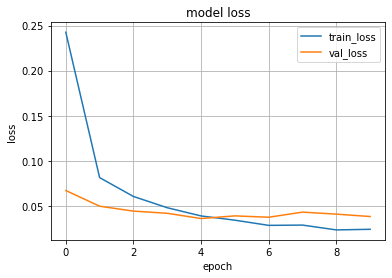

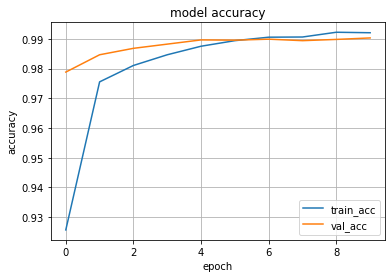

In [19]:
# plot for loss
plt.plot(cnn_history2.history['loss'], label='train_loss')
plt.plot(cnn_history2.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

# plot for accuracy
plt.plot(cnn_history2.history['accuracy'], label='train_acc')
plt.plot(cnn_history2.history['val_accuracy'], label='val_acc')
plt.title('model accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()


Now I have contructed the convolutional neural network model which decodes hand-written digits with the validation accuracy of 99.0%.  
Next, I apply this model to the test dataset to decode unseen hand-written digits.

In [20]:
#predict labels of test dataset using the constructed model
y_pred = cnn_model2.predict(x_test)
sum(y_pred.argmax(axis=1) == y_test.argmax(axis=1))/y_test.shape[0]

0.9906

The accuracy for the test dataset is 99.1%.

Text(83.40000000000006, 0.5, 'predicted label')

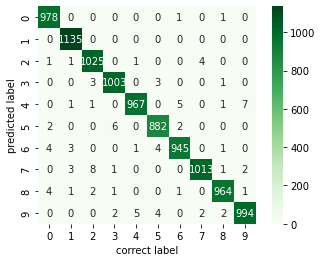

In [21]:
# visualize confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(cm, square=True, cbar=True, annot=True, fmt='d', cmap='Greens')

plt.xlabel('correct label')
plt.ylabel('predicted label')

Although the accuracy of the constructed model is good, there is still 0.9% error. So, I check the incorrect prediction.

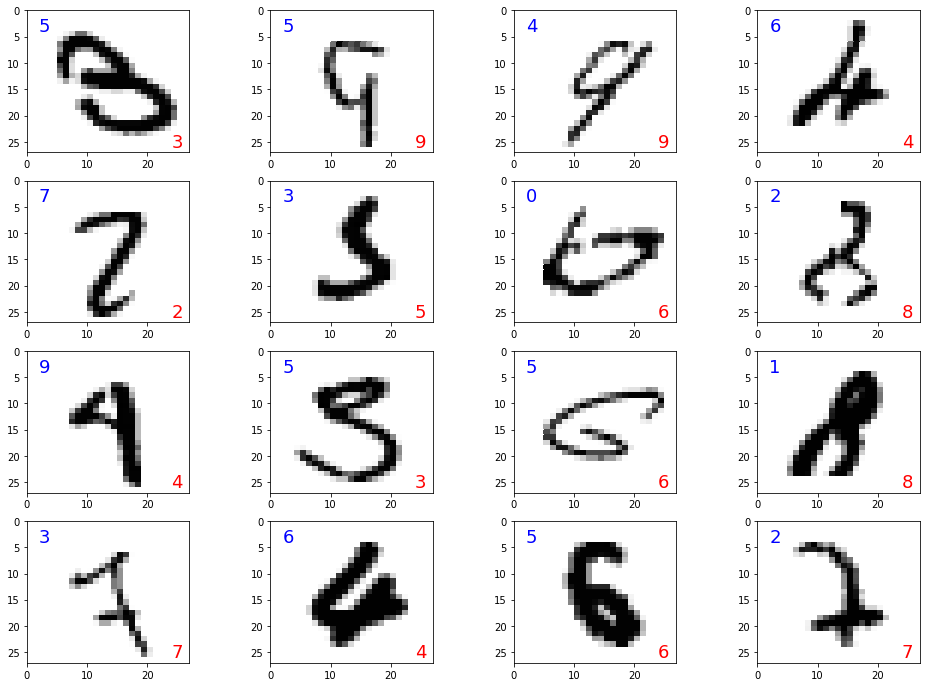

In [22]:
# visualize incorrect prediction
y_pred = cnn_model2.predict(x_test)
plt.figure(1, figsize=(16, 12))
plt.subplots_adjust(wspace=0.5)
plt.gray()
j = 0
for i,v in enumerate(y_pred):
    pred_ans = v.argmax()
    ans = y_test[i].argmax()
    fig_data = x_test[i]
    if (pred_ans != ans) & (j < 16):
        plt.subplot(4, 4, j + 1)
        img = x_test[i, :, :].reshape(28, 28)
        plt.pcolor(255 - img)
        plt.text(24, 26, "%d" % ans, color='red', fontsize=18)
        plt.text(2, 4, "%d" % pred_ans, color='blue', fontsize=18)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        j += 1
plt.show()

Blue: predicted label  
Red:  correct label

## Conclusions_1
My model which uses neural network framework can predict handwritten digits with the accuracy of 99.1%.  
The test accuracy almost reaches plateau level after 4 epochs.   
Some test figures are incorrectly predicted by the constructed model, but it is difficult to read some of these figures even in human eyes, as exemplified by "7" and "2".

### <b> Next, I will construct deep convolutional generative adversarial network (DCGAN) to generate "handwritten-like" characters through learning of generator and discriminator. </b>

## Method_2
Here I construct the DCGAN. First, I construct the discriminator model as the following:  
1. Convolution Layer: 64 filters, kernel size (5, 5), strides (1, 1), activation tanh  
2. Pooling layer: max pooling, pool size (2, 2)  
3. Convolution Layer: 128 filters, kernel size (5, 5), strides (1, 1), activation tanh  
4. Pooling layer: max pooling, pool size (2, 2)  
5. Flatten  
6. Dense layer: 1024 units, activation tanh  
7. Dense layer: 1 unit, activation sigmoid  
  
Next, I construct the generator model as the following:
1. Dense layer: 1024 units, activation tanh  
2. Dense layer: 7x7x128 units, batch normalization, activation tanh  
3. Up sampling, size (2, 2)  
4. Convolution Layer: 64 filters, kernel size (5, 5), strides (1, 1), activation tanh  
5. Up sampling, size (2, 2)  
6. Convolution Layer: 1 filter, kernel size (5, 5), strides (1, 1), activation tanh

I use MNIST dataset (Kussul and Baidyk, Image and Vision Computing, 2004;22:971-981). Sixty-thousand training data are used to train the DCGAN  (Randford et al, arXiv:1511.06434).


## Results_2

In [2]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize
x_train = (x_train.astype('float32') - 127.5) / 127.5

# reshape
x_train = x_train.reshape(-1, 28, 28, 1)

# check shape of the dataset
print('x_train :', x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train : (60000, 28, 28, 1)


In [11]:
# construct the discriminator model 
disc_model = Sequential()
disc_model.add(Conv2D(64, (5, 5), activation='tanh', padding='same', input_shape=(28, 28, 1)))
disc_model.add(MaxPooling2D(pool_size=(2, 2)))
disc_model.add(Conv2D(128, (5, 5), activation='tanh'))
disc_model.add(MaxPooling2D(pool_size=(2, 2)))
disc_model.add(Flatten())
disc_model.add(Dense(1024, activation='tanh'))
disc_model.add(Dense(1, activation='sigmoid'))


In [12]:
disc_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 128)       204928    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)             

In [13]:
# construct the generator model 
gen_model = Sequential()
gen_model.add(Dense(1024, activation='tanh', input_shape = (100, )))
gen_model.add(Dense(7 * 7 * 128))
gen_model.add(BatchNormalization())
gen_model.add(Activation('tanh'))
gen_model.add(Reshape((7, 7, 128), input_shape = (7 * 7 * 128,)))
gen_model.add(UpSampling2D(size = (2, 2)))
gen_model.add(Conv2D(64, (5, 5), activation='tanh', padding='same'))
gen_model.add(UpSampling2D(size = (2, 2)))
gen_model.add(Conv2D(1, (5, 5), activation='tanh', padding='same'))


In [14]:
gen_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1024)              103424    
                                                                 
 dense_7 (Dense)             (None, 6272)              6428800   
                                                                 
 batch_normalization_1 (Batc  (None, 6272)             25088     
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                  

In [15]:
disc_model.trainable = False
comb_model = Sequential()
comb_model.add(gen_model)
comb_model.add(disc_model)
comb_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 28, 28, 1)         6763777   
                                                                 
 sequential_3 (Sequential)   (None, 1)                 3485441   
                                                                 
Total params: 10,249,218
Trainable params: 6,751,233
Non-trainable params: 3,497,985
_________________________________________________________________


In [16]:
disc_opt = SGD(lr=0.0005, momentum=0.9, nesterov=True)
gen_opt = SGD(lr=0.0005, momentum=0.9, nesterov=True)

# compile the discriminator model
disc_model.trainable = True
disc_model.compile(loss='binary_crossentropy', optimizer=disc_opt)

# compile the combined model
disc_model.trainable = False #When the combined model is trained, the parameters of discriminator should be fixed.
comb_model.compile(loss='binary_crossentropy', optimizer=gen_opt)

gen_model.compile(loss='binary_crossentropy', optimizer="SGD")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [17]:
from PIL import Image

for epoch in range(50):
    print('Epoch {}/{}'.format(epoch + 1, 50))

    for i in range(int(x_train.shape[0]/128)):

        # train discriminator
        x = x_train[i * 128 : (i + 1) * 128]
        n = np.random.uniform(-1, 1, size=(128, 100))
        gen_images = gen_model.predict(n, verbose=0)
        y = np.array([1] * 128 + [0] * 128).reshape((-1,1))
        disc_model.trainable = True
        disc_loss = disc_model.train_on_batch(np.concatenate((x, gen_images)), y)

        # train generator
        n = np.random.uniform(-1, 1, size=(128, 100))
        y = np.array([1] * 128).reshape((-1,1))
        disc_model.trainable = False #When the combined model is trained, the parameters of discriminator should be fixed.
        gen_loss = comb_model.train_on_batch(n, y)
        

    print("discriminator loss: {}, generator loss: {}".format(disc_loss, gen_loss))     

    # save generated image (print 100 images as examples)
    if epoch % 10 == 0 or epoch == 49:
        tmp = [r.reshape(-1, 28) for r in np.split(gen_images[:100], 10)]
        img = np.concatenate(tmp, axis = 1)
        img = (img * 127.5 + 127.5).astype(np.uint8)
        Image.fromarray(img).save("{}.png".format(epoch))

        

Epoch 1/50
discriminator loss: 0.5249005556106567, generator loss: 1.052497386932373
Epoch 2/50
discriminator loss: 0.3910062909126282, generator loss: 1.2700588703155518
Epoch 3/50
discriminator loss: 0.4658607244491577, generator loss: 1.593231201171875
Epoch 4/50
discriminator loss: 0.2709161043167114, generator loss: 2.34173583984375
Epoch 5/50
discriminator loss: 0.21574760973453522, generator loss: 2.1148123741149902
Epoch 6/50
discriminator loss: 0.19048580527305603, generator loss: 2.969432830810547
Epoch 7/50
discriminator loss: 0.31291723251342773, generator loss: 1.8073842525482178
Epoch 8/50
discriminator loss: 0.4398518204689026, generator loss: 2.3205783367156982
Epoch 9/50
discriminator loss: 0.37007540464401245, generator loss: 1.4053653478622437
Epoch 10/50
discriminator loss: 0.4804612696170807, generator loss: 1.512482762336731
Epoch 11/50
discriminator loss: 0.4110558032989502, generator loss: 1.506842851638794
Epoch 12/50
discriminator loss: 0.47438254952430725, ge

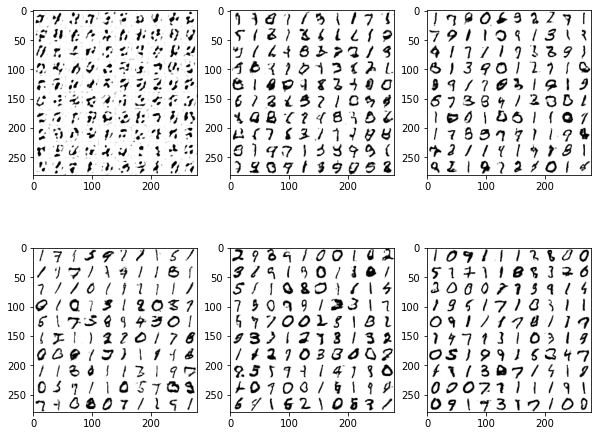

In [18]:
# print generated image (print 100 images as examples)

%matplotlib inline
import matplotlib.image as mpimg

image_path_list = ["./0.png", "./10.png", "./20.png", "./30.png", "./40.png", "./49.png"]

plt.figure(figsize=(10,8))
for i,d in enumerate(image_path_list):
    plt.subplot(2,3,i+1)
    plt.imshow(mpimg.imread(d),cmap="gray_r")

## Conclusions_2  

The above figures show examples of the generated images after 1, 11, 21, 31, 41, 50 epochs, respectively. We can read only few figures generated after 10 epochs. In contrast, we can read almost all figures generated after 50 epochs. These results indicate that, through the DCGAN, we can create "readable"  handwritten-like characters.  
In the strategy used in my model, the starting point to create characters is always to generate a tensor containg -1 through 1 randomly. This may be the reason why generated images contain many "0"s and "1"s after many epochs, which have simple architecture and is easy to create.

## Reference  
Kussul and Baidyk. Improved method of handwritten digit recognition tested on MNIST database. Image and Vision Computing. 2004;22:971-981.  
Radford et al. Unsupervised representation learning with deep convolutional generative adversarial networks. arXiv:1511.06434.  
